In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4)
# DataThief

# Radius in arcsec
bulgesbp_arcsec = np.loadtxt("../data/NGC5005-bulge_arcsec.txt")
rarcsec, bulge_arcsec, Yerr_arcsec1, Yerr_arcsec2 = bulgesbp_arcsec.T

# Radius in kpc
bulgesbp_kpc = np.loadtxt("../data/NGC5005-bulge_kpc.txt")
rkpc, bulge_kpc, Yerr_kpc1, Yerr_kpc2 = bulgesbp_kpc.T

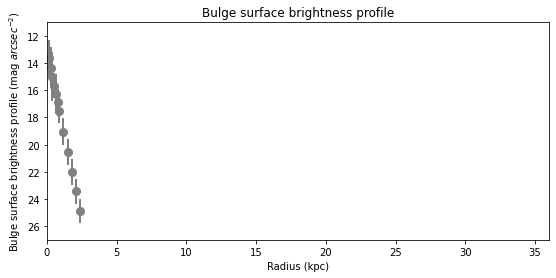

In [3]:
# Plot Bulge surface brightness profile in kpc
plt.figure(figsize=(9,4))
#plt.scatter(rkpc,bulge_kpc)
plt.errorbar(rkpc,bulge_kpc,yerr=[Yerr_kpc1,Yerr_kpc2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,36)
plt.ylim(27,11)
plt.show()

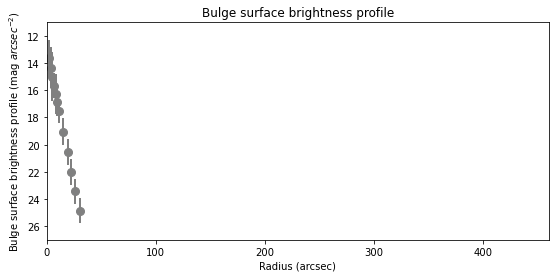

In [4]:
# Plot Bulge surface brightness profile in arcsec
plt.figure(figsize=(9,4))
plt.scatter(rarcsec,bulge_arcsec)
plt.errorbar(rarcsec,bulge_arcsec,yerr=[Yerr_arcsec1,Yerr_arcsec2], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', linewidth=2)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (arcsec)")
plt.ylabel("Bulge surface brightness profile (mag $arcsec^{-2}$)")
plt.xlim(0,460)
plt.ylim(27,11)
plt.show()

In [5]:
# Convert Mag/arcsec**2 to MSun/pc**2

distance = 16.5                             # Distance in megaparsec (from https://academic.oup.com/mnras/article/449/4/3981/1195237#920592944)
bulge_MSun_arcsec = 10**(-0.4*bulge_kpc)
bulge_MSun_pc = (0.000277778 * distance*1e6)**(-2) * bulge_MSun_arcsec
#print(bulge_kpc)
#print(bulge_MSun_arcsec[0])
print(bulge_MSun_pc)

[1.63665227e-13 8.60907355e-14 4.60210389e-14 2.62347191e-14
 1.44822626e-14 8.52464728e-15 4.70583200e-15 1.14529250e-15
 2.97273652e-16 7.46992804e-17 2.00187252e-17 5.27954406e-18]


In [6]:
#from https://physics.stackexchange.com/questions/207168/convert-from-relative-magnitude-to-mass

d=16.5e6 #pc
M = bulge_kpc - 5*(np.log(d)-1) #convert relative mag (bulge_kpc) to absolute mag M
Msun = 4.83 #absolute magnitude of the sun in full band
Lsun = 1 #in solar luminosities
L = np.exp((M - Msun)/(-2.5))*Lsun #convert mag to Luminosity
Y  = .5 #M-L ratio given in paper
Mstarsun = 1 #solar masses
Mstar = Mstarsun*(L/Lsun)/Y #convert luminosity to solar mass

Mstar = Mstar / d**2 #possibly converting arcsec^2 to pc^2 using small angle approximation
print(Mstar) #units of solar Mass per pc ^2

[7.91866364e-03 5.99078503e-03 4.56410510e-03 3.57563384e-03
 2.76240716e-03 2.19447417e-03 1.69537246e-03 9.17761670e-04
 5.10901973e-04 2.80433814e-04 1.58294582e-04 8.87317469e-05]


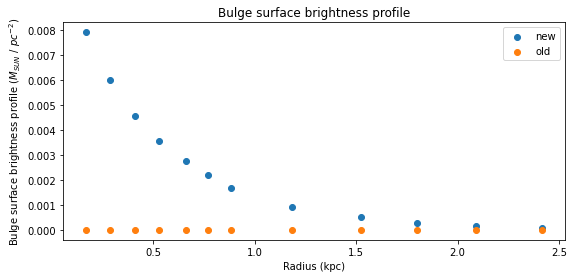

In [17]:
# Plot Bulge surface brightness profile in MSun/pc**2
plt.figure(figsize=(9,4))
A = plt.scatter(rkpc,Mstar, label ='new')
B = plt.scatter(rkpc,bulge_MSun_pc,label ='old')
#plt.scatter(rkpc,bulge_MSun_arcsec)
plt.title("Bulge surface brightness profile")
plt.xlabel("Radius (kpc)")
plt.ylabel("Bulge surface brightness profile ($M_{SUN}$ / $pc^{-2}$)")
#plt.ylim(0,1e-9)
plt.legend(handles=[A, B])
plt.show()


In [8]:
# Radius in kpc
np.savetxt("../data/bulge_msun_pc.txt", 
           np.transpose([rkpc, bulge_MSun_pc]), 
           delimiter='\t', 
           fmt='%10.5f',
           header='Datathief \n Bulge Surface Brightness from https://academic.oup.com/mnras/article/449/4/3981/1195237#92052944 (fig.4) \n MAG/ARCSEC**2 converted to MSUN/PC**2 in python \n units: x-axis: kpc, y-axis: Bulge (Msun pc^-2)')